# Classification naïve bayésienne


La classification naïve bayésienne est **un type de classification probabiliste simple basée sur le théorème de Bayes** avec une forte indépendance (dite naïve) des hypothèses. Elle met en œuvre un classifieur bayésien naïf, ou classifieur naïf de Bayes, appartenant à la famille des classifieurs linéaires.

On peut écrire notre modèle conditionnel tel que  $p(C\vert F_{1},\dots ,F_{n})\,$, 
où $C$ est une variable de classe dépendante dont les instances ou classes sont peu nombreuses, conditionnée par plusieurs variables caractéristiques $F1,...,Fn$. 

À l'aide du théorème de Bayes, nous écrivons : 

$$p(C\vert F_{1},\dots ,F_{n})={\frac  {p(C)\ p(F_{1},\dots ,F_{n}\vert C)}{p(F_{1},\dots ,F_{n})}}.\,$$

dans le langage courant on peut résumer cette équation par : 

$${\mbox{postérieure}}={\frac  {{\mbox{antérieure}}\times {\mbox{vraisemblance}}}{{\mbox{évidence}}}}.\,$$

Il est important que les variables explicatives soient indépendantes, si ce n’est pas le cas le modèle aura plus de mal à prédire correctement la variable cible ! 



## Avantages du modèle Naive Bayes

Le modèle Naive Bayes est un modèle qui présente naturellement un biais important et une faible variance, il est donc idéal pour entraîner des modèles sur de faibles volumes de données. Il ne nécessite pas de choisir la forme de la fonction qui lie $X$ et $Y$ et peut donc s’adapter à des problèmes non linéaires.


## Inconvénients de Naive Bayes

De part son biais élevé, le modèle Naive Bayes n’est pas idéal lorsque le volume de données devient élevé car il ne permettra pas d’atteindre les meilleurs performances possibles, contrairement aux Random Forests. 

Les classifieurs bayésiens traitent également chaque variable indépendamment, il ne pourra donc pas prendre en compte des informations issues de l'interaction entre plusieurs variables.


## Le dataset 

Le jeu de données `pima-indians-diabetes` provient de l'Institut national du diabète et des maladies digestives et rénales. L'objectif de l'ensemble de données est de **prédire de manière diagnostique si un patient est diabétique ou non, en fonction de certaines mesures de diagnostic incluses dans l'ensemble de données**. Plusieurs contraintes ont été placées sur la sélection de ces instances dans une base de données plus grande. En particulier, tous les patients ici sont des femmes d’au moins 21 ans et d’origine indienne Pima.
Ci-dessous, le nom des colonnes : 

```
columns={0:'Pregnancies',
         1:'Glucose',
         2:'BloodPressure', 
         3:'SkinThickness', 
         4:'Insulin',
         5:'BMI',
         6:'DiabetesPedigreeFunction',
         7:'Age',
         8:'Outcome'}
```


In [1]:
#importer vos lib
import warnings
warnings.simplefilter(action='ignore')


In [2]:
#importer le dataset pima-indians-diabetes


In [3]:
#afficher la tête de vos données 


0    1   2   3    4     5      6   7  8
0  6  148  72  35    0  33.6  0.627  50  1
1  1   85  66  29    0  26.6  0.351  31  0
2  8  183  64   0    0  23.3  0.672  32  1
3  1   89  66  23   94  28.1  0.167  21  0
4  0  137  40  35  168  43.1  2.288  33  1

In [4]:
#afficher les stats descriptives du dataset 


0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

In [5]:
#construire un nouveau dataset en supprimant les 0 dans les lignes
#afficher les statistique de ce nouveau dataset 


0           1           2           3           4           5  \
count  392.000000  392.000000  392.000000  392.000000  392.000000  392.000000   
mean     3.301020  122.627551   70.663265   29.145408  156.056122   33.086224   
std      3.211424   30.860781   12.496092   10.516424  118.841690    7.027659   
min      0.000000   56.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.000000   62.000000   21.000000   76.750000   28.400000   
50%      2.000000  119.000000   70.000000   29.000000  125.500000   33.200000   
75%      5.000000  143.000000   78.000000   37.000000  190.000000   37.100000   
max     17.000000  198.000000  110.000000   63.000000  846.000000   67.100000   

                6           7           8  
count  392.000000  392.000000  392.000000  
mean     0.523046   30.864796    0.331633  
std      0.345488   10.200777    0.471401  
min      0.085000   21.000000    0.000000  
25%      0.269750   23.000000    0.000000  
50%      0.449500   27.000000    0.000000  
75%      0.687000   36.000000    1.000000  
max      2.420000   81.000000    1.000000

In [6]:
#afficher les colonnes de votre dataset 


Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [7]:
#renommer les colones de votre dataset avec les variable dans la description si dessus 


## Les valeurs abérrantes 

Nous allons nous basé sur la mesure de l'écart interquartile. Par exemple, si ${\displaystyle Q_{1}} et {\displaystyle Q_{3}}$ sont respectivement le premier quartile et le troisième quartile, alors on peut définir une donnée aberrante comme étant toute valeur située à l'extérieur de l'intervalle: $${\displaystyle {\big [}Q_{1}-k(Q_{3}-Q_{1}) ; Q_{3}+k(Q_{3}-Q_{1}){\big ]}}$$
avec $k$ une constante positive. 

In [8]:
#créer la variable q1 correspondant au premier quantile de la variable 'Insulin'


76.75

In [9]:
#créer la variable q3 correspondant au troisième quantile de la variable 'Insulin'


190.0

In [10]:
#définir l'intervalle énoncé ci-dessus avec k=1.5
#afficher l'intervalle 
#que remarquez vous ? 


Intervalle interquartile : [-93.125 ; 359.875] 


In [11]:
#définir un masque dans votre dataset afin de filtrer les individus dépassant la borne supérieur 
#prendre k=1.5


In [12]:
#afficher ces individus par classe 


1    15
0    10
Name: Outcome, dtype: int64

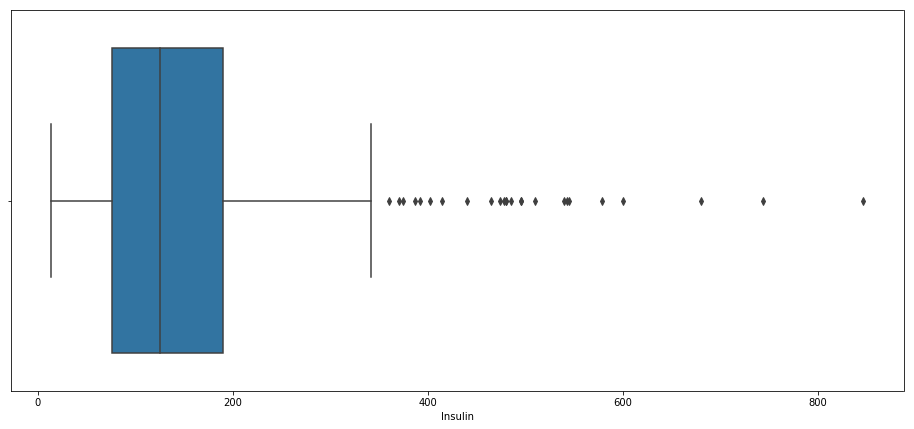

In [13]:
#afficher une boxplot de votre variable 
#que remarquez vous ? 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


In [14]:
#créer un nouveau dataset pour les individus abérrants 


In [15]:
#afficher votre dataset 


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
6             3       78             50             32       88  31.0   
8             2      197             70             45      543  30.5   
13            1      189             60             23      846  30.1   

    DiabetesPedigreeFunction  Age  insuline_aberrant  
3                      0.167   21              False  
4                      2.288   33              False  
6                      0.248   26              False  
8                      0.158   53               True  
13                     0.398   59               True

## Indépendance, corrélation et normalité 

In [16]:
#effectuer des test de student sur vos variables 2 à 2 
#ranger les résultat des test dans un tableau appelé test_result
#utiliser la méthode ttest_ind de scipy


In [17]:
#afficher votre vecteur test_result
#que marquez vous ?


[['Pregnancies', 'Glucose', 0.0],
 ['Pregnancies', 'BloodPressure', 0.0],
 ['Pregnancies', 'SkinThickness', 0.0],
 ['Pregnancies', 'Insulin', 0.0],
 ['Pregnancies', 'BMI', 0.0],
 ['Pregnancies', 'DiabetesPedigreeFunction', 1.5150486355681569e-55],
 ['Pregnancies', 'Age', 0.0],
 ['Glucose', 'BloodPressure', 0.0],
 ['Glucose', 'SkinThickness', 0.0],
 ['Glucose', 'Insulin', 9.314347797149482e-08],
 ['Glucose', 'BMI', 0.0],
 ['Glucose', 'DiabetesPedigreeFunction', 0.0],
 ['Glucose', 'Age', 0.0],
 ['BloodPressure', 'SkinThickness', 0.0],
 ['BloodPressure', 'Insulin', 1.247189726766044e-40],
 ['BloodPressure', 'BMI', 0.0],
 ['BloodPressure', 'DiabetesPedigreeFunction', 0.0],
 ['BloodPressure', 'Age', 0.0],
 ['SkinThickness', 'Insulin', 2.394527471199125e-78],
 ['SkinThickness', 'BMI', 1.103926415575936e-09],
 ['SkinThickness', 'DiabetesPedigreeFunction', 0.0],
 ['SkinThickness', 'Age', 0.02040562078074461],
 ['Insulin', 'BMI', 8.560440687697287e-75],
 ['Insulin', 'DiabetesPedigreeFunction', 

In [18]:
#afficher la taille du vecteur test_result
#que remarquez vous ? 


28

In [19]:
#faite de meme avec la corrélation des variables 2 à 2 
#utiliser la méthode corrcoef de numpy


In [20]:
#afficher votre tableau de corrélation 


[['Pregnancies', 'Pregnancies', 0.9999999999999999],
 ['Pregnancies', 'Glucose', 0.19829104308052087],
 ['Pregnancies', 'BloodPressure', 0.21335477472245085],
 ['Pregnancies', 'SkinThickness', 0.0932093974054524],
 ['Pregnancies', 'Insulin', 0.07898362510990971],
 ['Pregnancies', 'BMI', -0.025347276056046256],
 ['Pregnancies', 'DiabetesPedigreeFunction', 0.007562116438437554],
 ['Pregnancies', 'Age', 0.6796084703853134],
 ['Glucose', 'Glucose', 1.0],
 ['Glucose', 'BloodPressure', 0.21002657364775343],
 ['Glucose', 'SkinThickness', 0.19885581885227427],
 ['Glucose', 'Insulin', 0.5812230123542533],
 ['Glucose', 'BMI', 0.20951591881842818],
 ['Glucose', 'DiabetesPedigreeFunction', 0.1401801799076905],
 ['Glucose', 'Age', 0.34364149991026494],
 ['BloodPressure', 'BloodPressure', 1.0],
 ['BloodPressure', 'SkinThickness', 0.23257118913532568],
 ['BloodPressure', 'Insulin', 0.09851150312787163],
 ['BloodPressure', 'BMI', 0.30440336850359956],
 ['BloodPressure', 'DiabetesPedigreeFunction', -0.

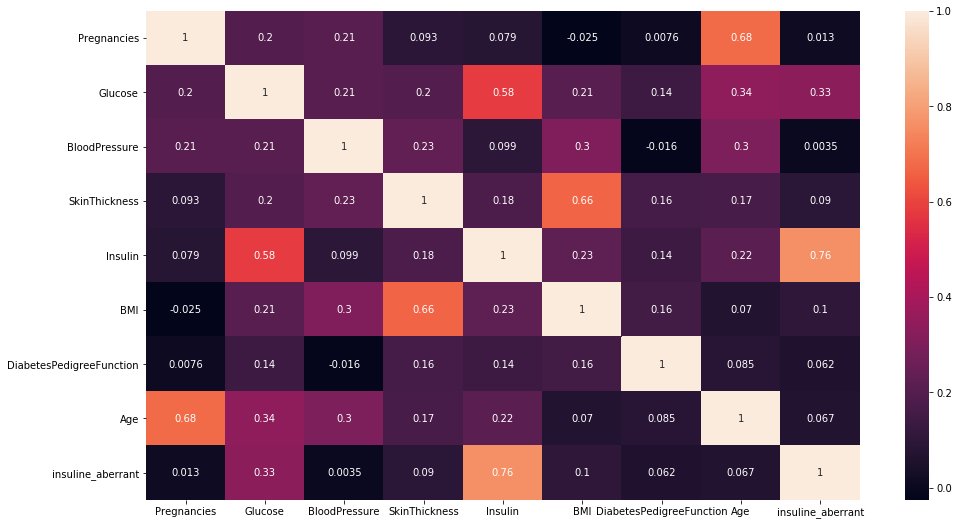

In [21]:
#afficher une heatmap de corrélation et vérifier votre tableau ci-dessus 


In [22]:
#calculer un tableau des informations mutuelles des variables 2 à 2 
#utiliser la méthode mutual_info_regression de sklearn  


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [23]:
#afficher votre tableau 


[['Pregnancies', 'Pregnancies', 2.2736527229471135],
 ['Pregnancies', 'Glucose', 0.06230826884354945],
 ['Pregnancies', 'BloodPressure', 0.04128938009668337],
 ['Pregnancies', 'SkinThickness', 0.06981419164525038],
 ['Pregnancies', 'Insulin', 0.07144695759892006],
 ['Pregnancies', 'BMI', 0.02266307126704259],
 ['Pregnancies', 'DiabetesPedigreeFunction', 0.011517435047145419],
 ['Pregnancies', 'Age', 0.3589564459068493],
 ['Glucose', 'Glucose', 4.253121630357338],
 ['Glucose', 'BloodPressure', 0.025865291162842308],
 ['Glucose', 'SkinThickness', 0.035839119969039324],
 ['Glucose', 'Insulin', 0.24815944945864699],
 ['Glucose', 'BMI', 0.07157269657654197],
 ['Glucose', 'DiabetesPedigreeFunction', 0.004637248822719098],
 ['Glucose', 'Age', 0.08298657569152468],
 ['BloodPressure', 'BloodPressure', 3.1197847440079407],
 ['BloodPressure', 'SkinThickness', 0.06920103345723172],
 ['BloodPressure', 'Insulin', 0.02376809930834689],
 ['BloodPressure', 'BMI', 0.04098648168260466],
 ['BloodPressure'

In [24]:
#separer votre dataset en 2 
#un dataset pour les positif (outcome==1)
#un dataset pour les négatifs (outcome==0)


In [25]:
#vérifier la séparation en affichant votre dataset


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4             0      137             40             35      168  43.1   
6             3       78             50             32       88  31.0   
8             2      197             70             45      543  30.5   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   

    DiabetesPedigreeFunction  Age  Outcome  
4                      2.288   33        1  
6                      0.248   26        1  
8                      0.158   53        1  
13                     0.398   59        1  
14                     0.587   51        1

In [26]:
#vérifier la séparation en affichant votre dataset


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1       89             66             23       94  28.1   
18            1      103             30             38       83  43.3   
20            3      126             88             41      235  39.3   
27            1       97             66             15      140  23.2   
28           13      145             82             19      110  22.2   

    DiabetesPedigreeFunction  Age  Outcome  
3                      0.167   21        0  
18                     0.183   33        0  
20                     0.704   27        0  
27                     0.487   22        0  
28                     0.245   57        0

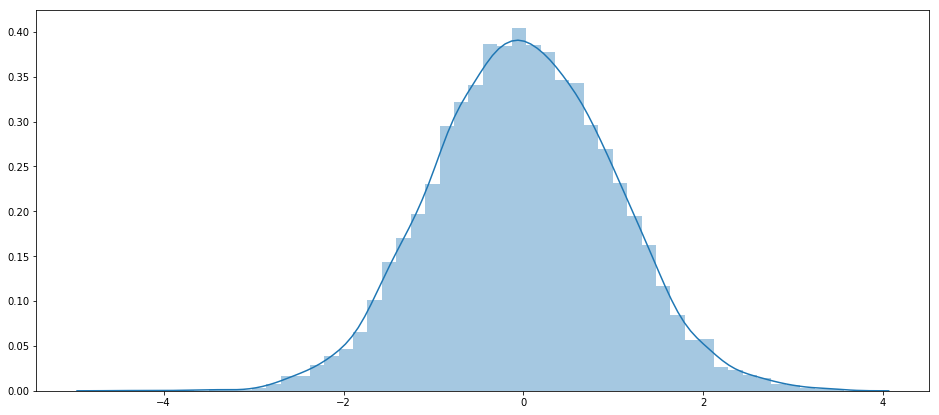

In [27]:
#afficher une lois normal de size=10000


In [28]:
#tester la normalité de sur nos données des positifs  
#faire une boucle sur votre dataset 
#appliquer la méthode normaltest de scipy 
#enfin stocker la p-value associé dans une liste 


In [29]:
#faire la meme chose sur les données des négatifs 


In [30]:
#afficher le tableau des p-value pour l'ensemble des négatifs 
#que remarquez vous ? 


[['Pregnancies', 2.639388327961267e-17],
 ['Glucose', 1.3681430238566277e-05],
 ['BloodPressure', 0.07551043574204534],
 ['SkinThickness', 0.007786179616197784],
 ['Insulin', 7.767115230392163e-36],
 ['BMI', 0.015637691592256094],
 ['DiabetesPedigreeFunction', 2.6125230817653396e-27],
 ['Age', 2.3667823240888496e-30]]

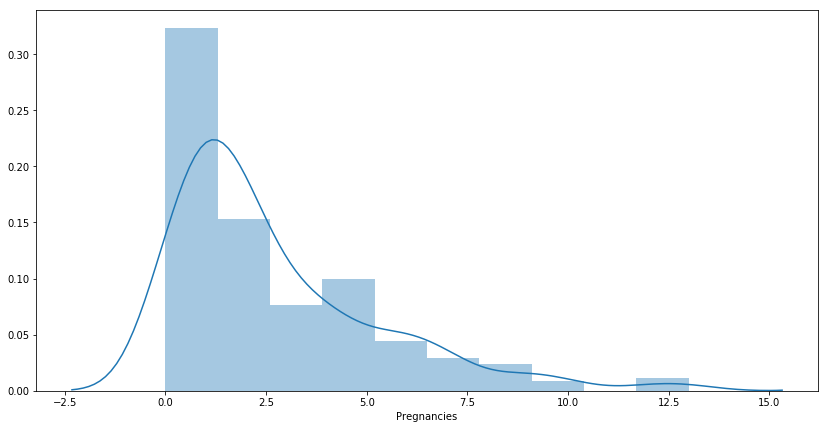

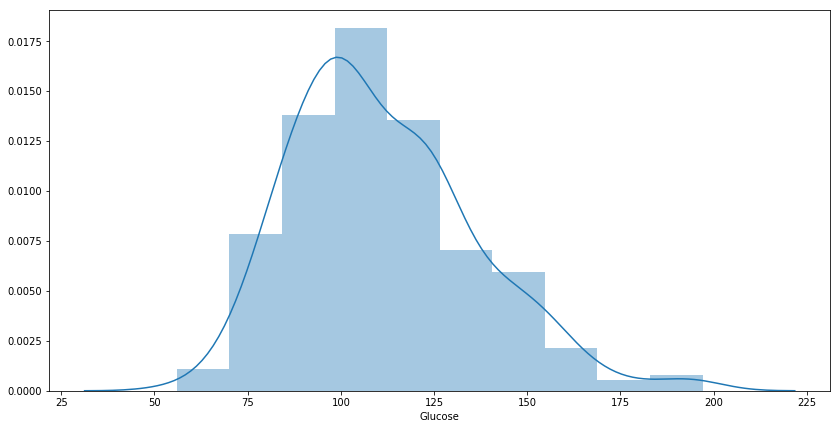

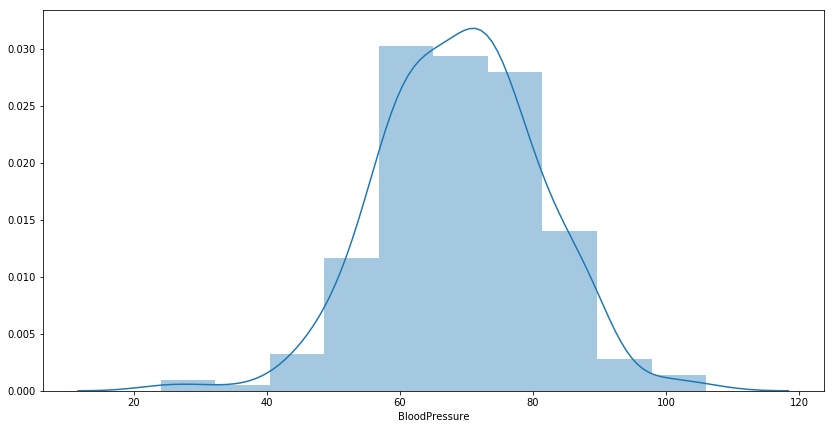

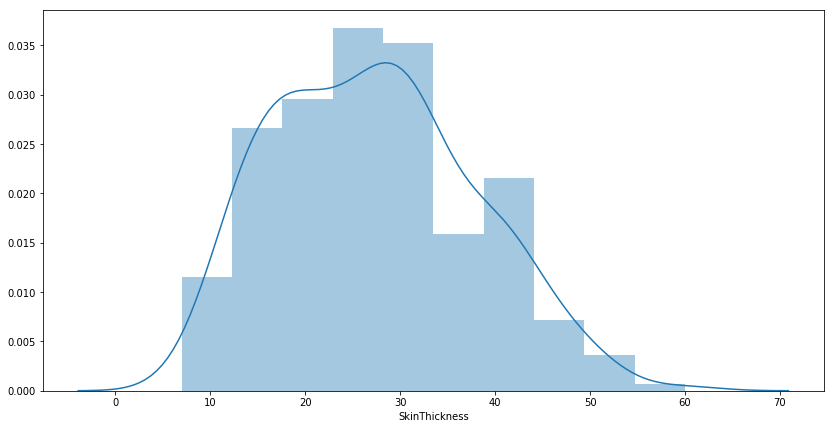

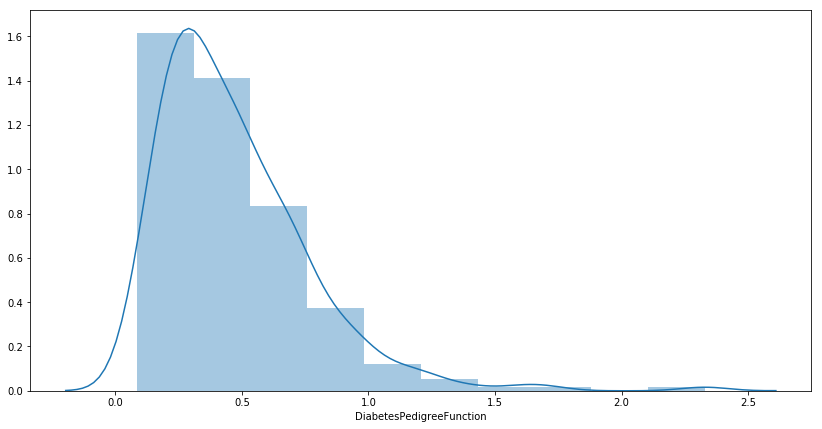

In [31]:
#vérifier à l'aide de plot vos hypothèse ci-dessus 
#prendre bins=10 pour le plot 
#que pouvez vous en déduire quant à la p-value ? 


In [32]:
#séparer votre jeux de donnée en deux ensemble de train test
#vous prendrez les paramètres : random_state = 42 et test_size = 0.3


In [33]:
#instancier un naive bayes estimator 


In [34]:
#fiter sur les données d'entrainement (de base pas celle extrapolés) et afficher le score du modèle 


score du modèle sur le jeux de base : 72.88%


In [35]:
#créer un nouveau dataframe à partir du dataset de test noté control 
#ajouter à ce datatset la colonne y := dataset ytest 
#ajouter à ce datatset la colonne y_pred := prediction de l'estimator 


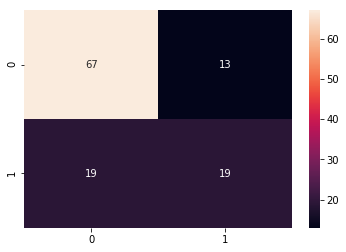

In [36]:
#afficher la matrice de confusion 
#que remarquez vous ? 


## Bonus : création de nouvelles variables & bagging 

In [37]:
#discretiser votre ensemble d'entrainement 
#utiliser la méthode KBinsDiscretizer avec les paramètres présent dans l'output 


KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='quantile')

In [38]:
#fiter la méthode KBinsDiscretizer sur votre ensemble d'entrainement 


In [39]:
#utiliser votre fit afin de générer de nouveaux dataset de train et de test et dummifier le 


In [40]:
#afficher les shape de votre dataset de train de base et celle du nouveau dataset  
#pareil pour le test 


train shape : (274, 9) | (274, 78)
test shape : (118, 9) | (118, 78)


In [41]:
#afficher les colonnes de votre nouveau dataset de train


Index(['Pregnancies_1.0', 'Pregnancies_3.0', 'Pregnancies_5.0',
       'Pregnancies_6.0', 'Pregnancies_7.0', 'Pregnancies_8.0',
       'Pregnancies_9.0', 'Glucose_0.0', 'Glucose_1.0', 'Glucose_2.0',
       'Glucose_3.0', 'Glucose_4.0', 'Glucose_5.0', 'Glucose_6.0',
       'Glucose_7.0', 'Glucose_8.0', 'Glucose_9.0', 'BloodPressure_0.0',
       'BloodPressure_1.0', 'BloodPressure_2.0', 'BloodPressure_3.0',
       'BloodPressure_4.0', 'BloodPressure_5.0', 'BloodPressure_6.0',
       'BloodPressure_7.0', 'BloodPressure_8.0', 'BloodPressure_9.0',
       'SkinThickness_0.0', 'SkinThickness_1.0', 'SkinThickness_2.0',
       'SkinThickness_3.0', 'SkinThickness_4.0', 'SkinThickness_5.0',
       'SkinThickness_6.0', 'SkinThickness_7.0', 'SkinThickness_8.0',
       'SkinThickness_9.0', 'Insulin_0.0', 'Insulin_1.0', 'Insulin_2.0',
       'Insulin_3.0', 'Insulin_4.0', 'Insulin_5.0', 'Insulin_6.0',
       'Insulin_7.0', 'Insulin_8.0', 'Insulin_9.0', 'BMI_0.0', 'BMI_1.0',
       'BMI_2.0', 'BMI_3.0'

In [42]:
#fiter sur vos données d'entrainement extrapolés à l'aide du KBinsDiscretizer et afficher le score de ce modèle 
#que remarquez vous ? 


score du modèle sur le jeux extrapolé : 76.27%


In [43]:
#utiliser le BaggingClassifier estimator de sklean et affciher l'accuracy du modèle 


Accuracy du model sur le dataset de test 72.881% 
